# Analyse de l'incidence de la varicelle

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

## Importation des données brutes

In [3]:
data_url = 'https://www.sentiweb.fr/datasets/incidence-PAY-7.csv'
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202126          7   6779     2197   11361      10           3   
1     202125          7   9254     6439   12069      14          10   
2     202124          7  12034     8937   15131      18          13   
3     202123          7   9116     6420   11812      14          10   
4     202122          7   4817     2752    6882       7           4   
5     202121          7   6092     3458    8726       9           5   
6     202120          7   7485     4601   10369      11           7   
7     202119          7   6654     4370    8938      10           7   
8     202118          7   3912     2110    5714       6           3   
9     202117          7   4686     2878    6494       7           4   
10    202116          7   4780     2891    6669       7           4   
11    202115          7  11215     7627   14803      17          12   
12    202114          7  11197     7994   14400      17          12   
13    202113          7   9714     6289   13139      15          10   
14    202112          7  11520     8415   14625      17          12   
15    202111          7   9386     6678   12094      14          10   
16    202110          7   9056     6452   11660      14          10   
17    202109          7  10988     7938   14038      17          12   
18    202108          7  11281     8361   14201      17          13   
19    202107          7  13561    10315   16807      21          16   
20    202106          7  13401     9810   16992      20          15   
21    202105          7  12210     8988   15432      18          13   
22    202104          7  12026     8826   15226      18          13   
23    202103          7   8913     6375   11451      13           9   
24    202102          7   7795     5430   10160      12           8   
25    202101          7  10525     7750   13300      16          12   
26    202053          7  11978     8406   15550      18          13   
27    202052          7  12012     8285   15739      18          12   
28    202051          7  10564     7574   13554      16          11   
29    202050          7   7063     4744    9382      11           7   
...      ...        ...    ...      ...     ...     ...         ...   
1566  199126          7  17608    11304   23912      31          20   
1567  199125          7  16169    10700   21638      28          18   
1568  199124          7  16171    10071   22271      28          17   
1569  199123          7  11947     7671   16223      21          13   
1570  199122          7  15452     9953   20951      27          17   
1571  199121          7  14903     8975   20831      26          16   
1572  199120          7  19053    12742   25364      34          23   
1573  199119          7  16739    11246   22232      29          19   
1574  199118          7  21385    13882   28888      38          25   
1575  199117          7  13462     8877   18047      24          16   
1576  199116          7  14857    10068   19646      26          18   
1577  199115          7  13975     9781   18169      25          18   
1578  199114          7  12265     7684   16846      22          14   
1579  199113          7   9567     6041   13093      17          11   
1580  199112          7  10864     7331   14397      19          13   
1581  199111          7  15574    11184   19964      27          19   
1582  199110          7  16643    11372   21914      29          20   
1583  199109          7  13741     8780   18702      24          15   
1584  199108          7  13289     8813   17765      23          15   
1585  199107          7  12337     8077   16597      22          15   
1586  199106          7  10877     7013   14741      19          12   
1587  199105          7  10442     6544   14340      18          11   
1588  199104          7   7913     4563   11263      14           8   
1589  199103          7  15387    10484   20290      27          18   
1590  199102          7  16277  

## Recherche d'erreur ou de données manquantes

In [10]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de données manquante. Convertissons désormais le champ "week" en un format approprié pour l'analyse de pandas.
## Conversion des dates et tri des données par date

In [42]:
def convert_week(yw):
    yw_string = str(yw)
    year = int(yw_string[:4])
    week = int(yw_string[4:])
    monday = isoweek.Week(year, week).day(0)
    period = pd.Period(monday,'W') 
    return period
raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]
data = raw_data.set_index('period').sort_index()
data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2020-12-07/2020-12-13  202050          7   7063     4744    9382      11   
2020-12-14/2020-12-20  202051          7  10564     7574   13554      16   
2020-12-21/2020-12-27  202052          7  12012     8285   15739      18   
2020-12-28/2021-01-03  202053          7  11978     8406   15550      18   
2021-01-04/2021-01-10  202101          7  10525     7750   13300      16   
2021-01-11/2021-01-17  202102          7   7795     5430   10160      12   
2021-01-18/2021-01-24  202103          7   8913     6375   11451      13   
2021-01-25/2021-01-31  202104          7  12026     8826   15226      18   
2021-02-01/2021-02-07  202105          7  12210     8988   15432      18   
2021-02-08/2021-02-14  202106          7  13401     9810   16992      20   
2021-02-15/2021-02-21  202107          7  13561    10315   16807      21   
2021-02-22/2021-02-28  202108          7  11281     8361   14201      17   
2021-03-01/2021-03-07  202109          7  10988     7938   14038      17   
2021-03-08/2021-03-14  202110          7   9056     6452   11660      14   
2021-03-15/2021-03-21  202111          7   9386     6678   12094      14   
2021-03-22/2021-03-28  202112          7  11520     8415   14625      17   
2021-03-29/2021-04-04  202113          7   9714     6289   13139      15   
2021-04-05/2021-04-11  202114          7  11197     7994   14400      17   
2021-04-12/2021-04-18  202115          7  11215     7627   14803      17   
2021-04-19/2021-04-25  202116          7   4780     2891    6669       7 

## Calcul des années les plus intense et les plus faibles

In [70]:
week_start

Period('1990-08-27/1990-09-02', 'W-SUN')

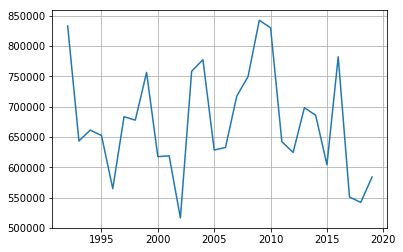

In [94]:
first_week_of_september = [pd.Period(pd.Timestamp(y,9,1),'W') 
                           for y in range(data.index[0].year,
                                          data.index[-1].year)]
years = []
total_inc = []
for week_start, week_end in zip(first_week_of_september_trunc[:-1],
                                first_week_of_september_trunc[1:]):
    data_extract = data['inc'][week_start : week_end-1]
    assert data_extract.size in range(51,54)
    total_inc.append(data_extract.sum())
    years.append(week_end.year)
yearly_inc = pd.Series(total_inc,index=years)
yearly_inc.plot()
plt.grid()

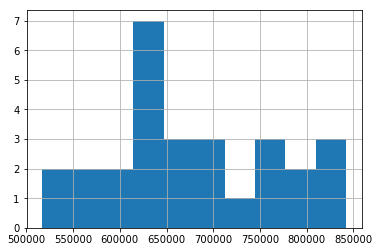

In [95]:
yearly_inc.hist()

In [96]:
yearly_inc.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64